In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

from utils_atm import * 

In [2]:
variables = ['msl', 'skt'] #, 'tp','wind', '10fgg25'] #list of variables to visualize
stdate = datetime(2023, 9, 7, 0, 0)
cyclone_days = 2
windprobsteps = [f"{12 * i}-{ 12 * i + 24}" for i in range(2*cyclone_days-1)]
windprobsteps.insert(0, "0-24")
stepsdict = {
               "base": list(np.arange(12, 240, 12)[0:2*cyclone_days]),
               "10fgg25": windprobsteps
            }

In [21]:
stepsdict["base"]

[12, 24, 36, 48]

In [3]:
fnames = dwnl_atmdata_step(variables, stepsdict, stdate = 0, source = "ecmwf");

In [4]:
update_dwnl_atmdata(variables, stepsdict, stdate = 0, source = "ecmwf")

<multiple>:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

['data/atm/test_msl.grib', 'data/atm/test_skt.grib']

In [5]:
f = xr.load_dataset('data/atm/test_msl.grib', engine = "cfgrib")

In [31]:
steps = list(np.array(stepsdict["base"] )* (60*60*10**9))

In [48]:
f.step

<xarray.DataArray 'step' (step: 4)>
array([ 43200000000000,  86400000000000, 129600000000000, 172800000000000],
      dtype='timedelta64[ns]')
Coordinates:
    time        datetime64[ns] 2024-03-28
  * step        (step) timedelta64[ns] 0 days 12:00:00 ... 2 days 00:00:00
    meanSea     float64 0.0
    valid_time  (step) datetime64[ns] 2024-03-28T12:00:00 ... 2024-03-30
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period

In [46]:
test = f.isel(step = 0)['msl']

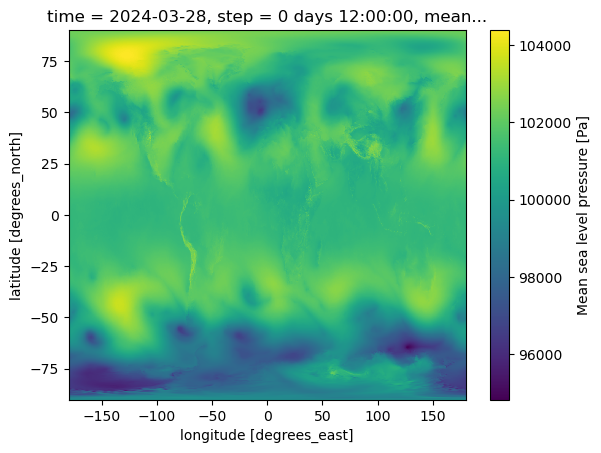

In [47]:
test.plot()